In [1]:
import pandas as pd
dataset = pd.read_csv("~/Downloads/titanic/train.csv")
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
dataset.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic_drop = dataset.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"]).dropna()
titanic_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
titanic_with_dummies = pd.get_dummies(titanic_drop, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_with_dummies.head()


,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [5]:
cols = [col for col in titanic_with_dummies.columns.values if col != "Survived"]
X = titanic_with_dummies[cols]
y = titanic_with_dummies["Survived"]


In [6]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X, y)
cls.score(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

In [7]:
import numpy as np
df = pd.DataFrame(np.array([cls.predict(X),y]).T)
df = pd.concat([df,pd.DataFrame(cls.predict_proba(X))], axis=1)
df.columns = ["Predicted","GT","Probability Die","Probability Survive"]
df.head()

,Predicted,GT,Probability Die,Probability Survive
0,0,0,0.894468,0.105532
1,1,1,0.117443,0.882557
2,1,1,0.402307,0.597693
3,1,1,0.145397,0.854603
4,0,0,0.903597,0.096403


In [8]:
from sklearn import metrics
import matplotlib.pyplot as plt


def plotMetrics(X, y, cls):
    y_pred_proba = cls.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    plt.title("AUC: {}".format(auc))
    plt.plot(fpr,tpr)
plotMetrics(X,y,cls)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


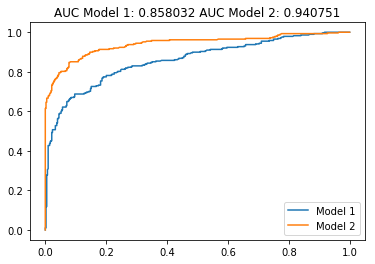

In [9]:
from sklearn import svm
cls_svm = svm.SVC(probability=True)
cls_svm.fit(X, y)

def plotMetricsCompare(X, y, cls1, cls2):
    y_pred_proba = cls1.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    
    y_pred_proba1 = cls2.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y, y_pred_proba1)

    plt.title("AUC Model 1: {:2f} AUC Model 2: {:2f}".format(auc, auc1))
    plt.plot(fpr,tpr)
    plt.plot(fpr1,tpr1)
    plt.legend(["Model 1", "Model 2"])

plotMetricsCompare(X,y,cls,cls_svm)
